In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from ctapipe.io.lsteventsource import LSTEventSource
from ctapipe.io import EventSeeker

In [18]:
hg = 0
lg = 1
#nr - number module 

def get_data_from_module(event, nr):
    fc = np.zeros((2, 8))
    first_cap = event.lst.tel[0].evt.first_capacitor_id[nr * 8:(nr + 1) * 8]
    for channel_hg in [0, 2, 4, 6]:
        fc[hg, channel_hg] = first_cap[channel_hg]
        fc[hg, channel_hg+1] = first_cap[channel_hg]
    for channel_lg in [1, 3, 5, 7]:
        fc[lg, channel_lg-1] = first_cap[channel_lg]
        fc[lg, channel_lg] = first_cap[channel_lg]
        
    waveform = event.r0.tel[0].waveform[:, nr*7:(nr+1)*7, :]
    return waveform, fc

def plot(event, nr, gain):
    t = np.linspace(0, 39, 40)
    data =  event.r0.tel[0].waveform[:, nr*7:(nr+1)*7, :]
    fig, ax = plt.subplots(2, 4)
    ax[0, 0].step(t, data[gain, 0, 2:38])
    ax[0, 1].step(t, data[gain, 1, :])
    ax[0, 2].step(t, data[gain, 2, :])
    ax[0, 3].step(t, data[gain, 3, :])
    ax[1, 0].step(t, data[gain, 4, :])
    ax[1, 1].step(t, data[gain, 5, :])
    ax[1, 2].step(t, data[gain, 6, :])
    plt.show()
    
def plot_remove_pedestal():
    pass

/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/protozfits/__init__.py:56: UserWarning:         Multiple open zfits files at the same time are not supported.
        Reading from mutliple open tables at the same time will reset these
        tables continously and you will read always the same events.
        
  ''')


plot i= 0


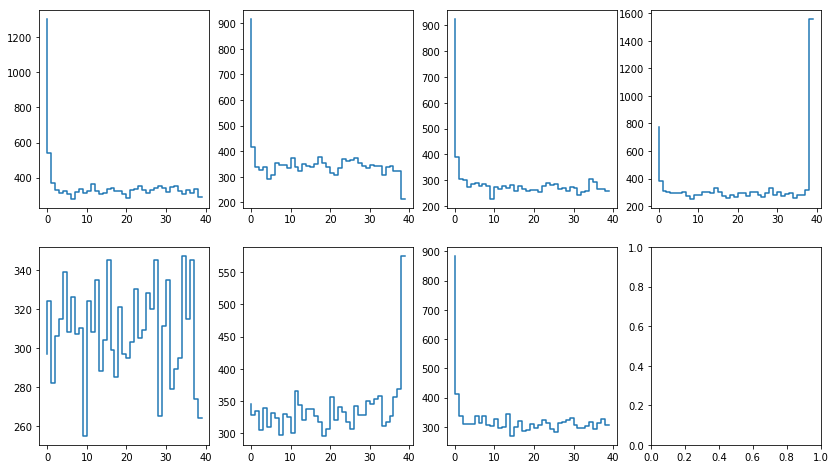

plot i= 100


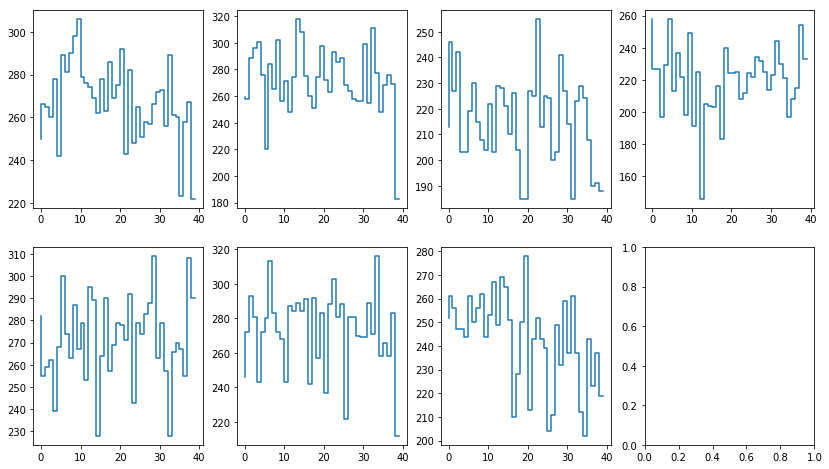

plot i= 200


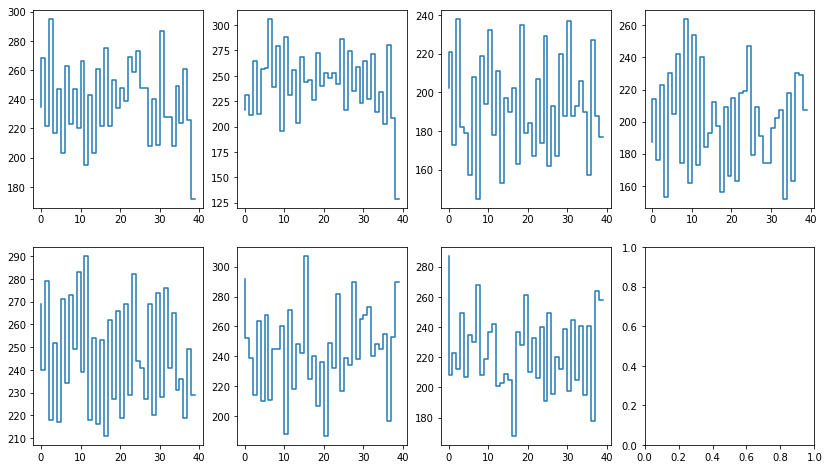

plot i= 300


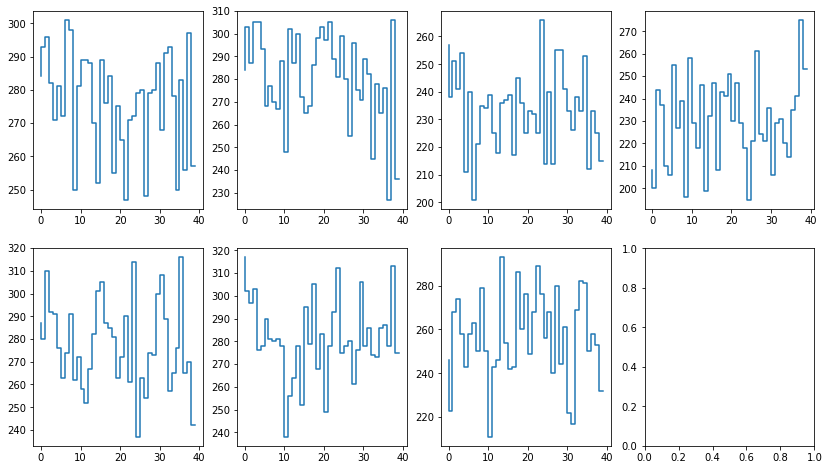

plot i= 400


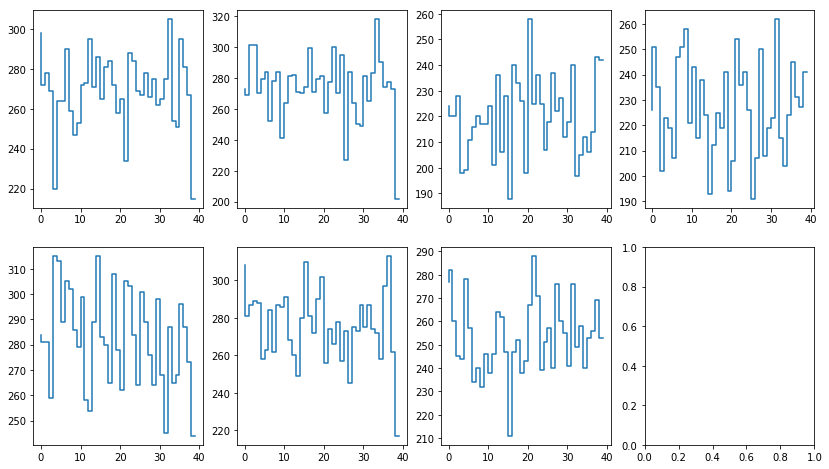

plot i= 500


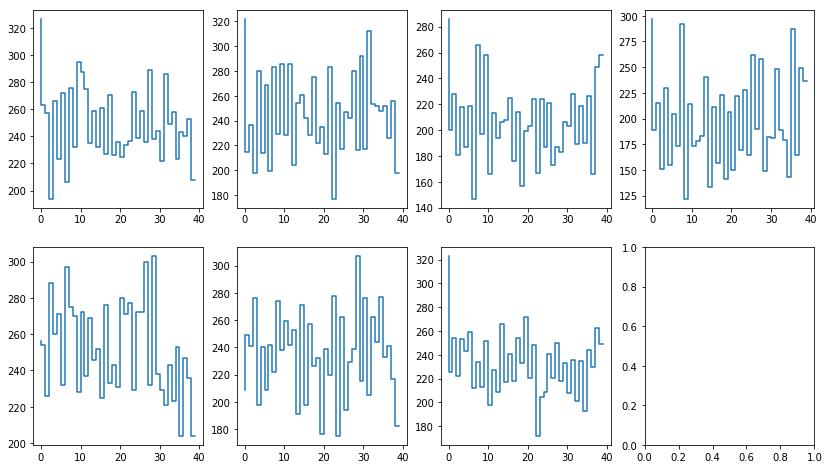

plot i= 600


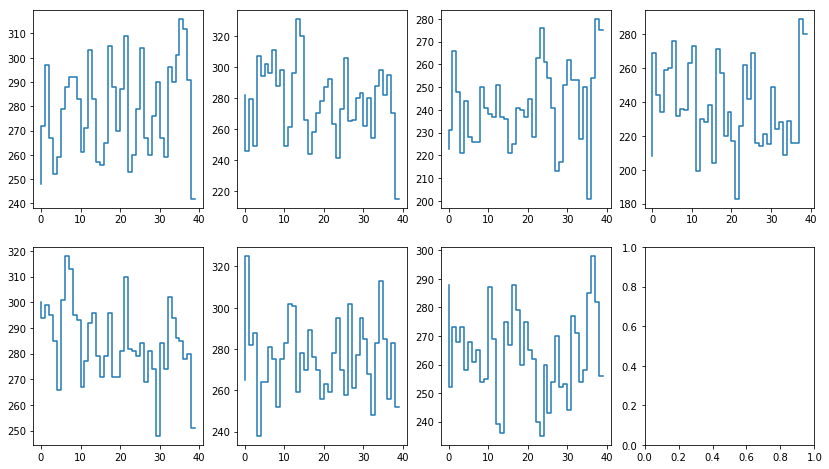

plot i= 700


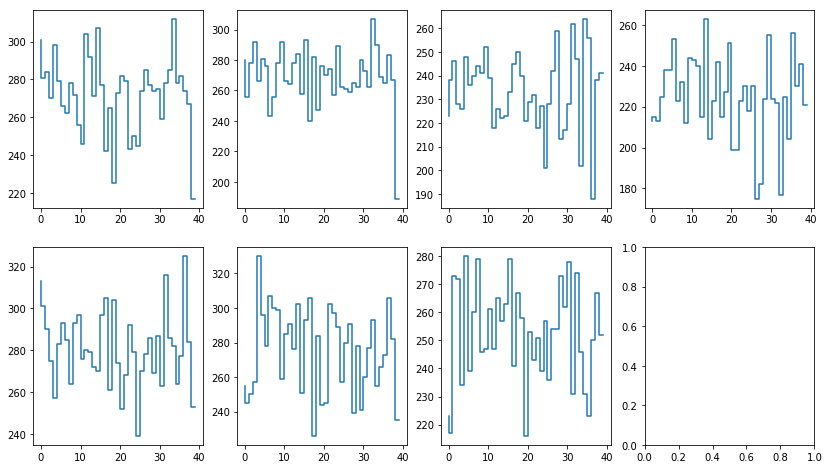

plot i= 800


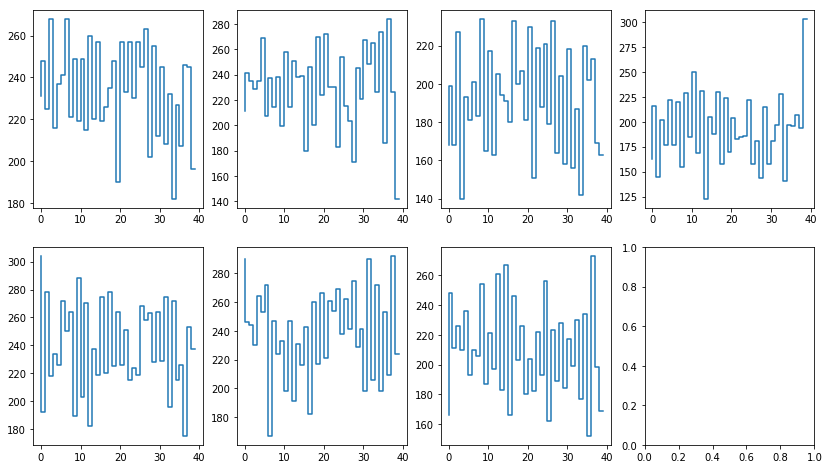

plot i= 900


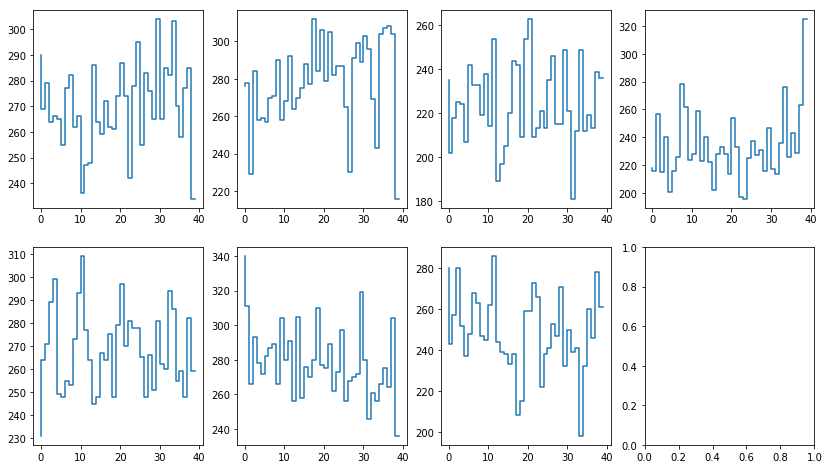

plot i= 1000


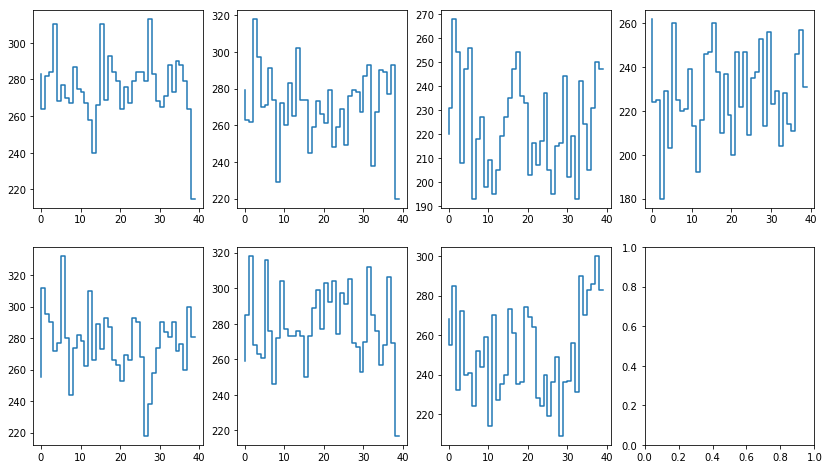

plot i= 1100


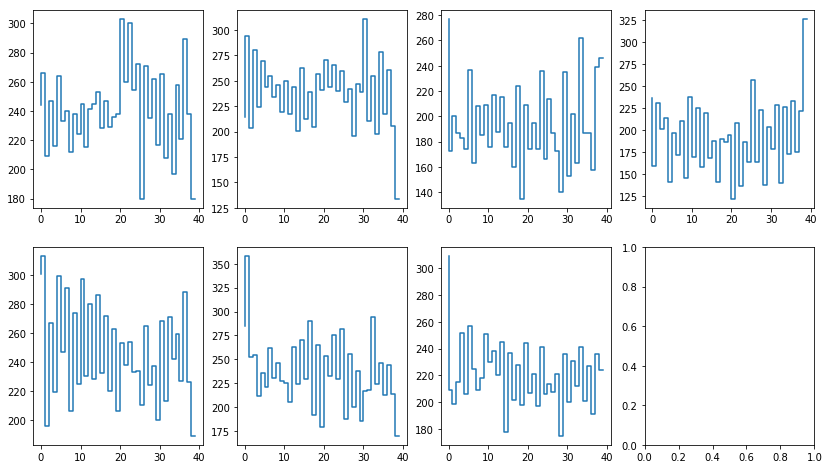

plot i= 1200


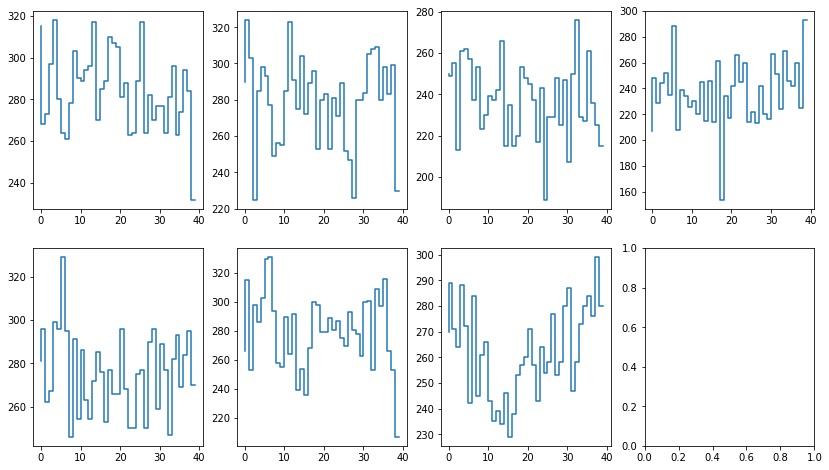

plot i= 1300


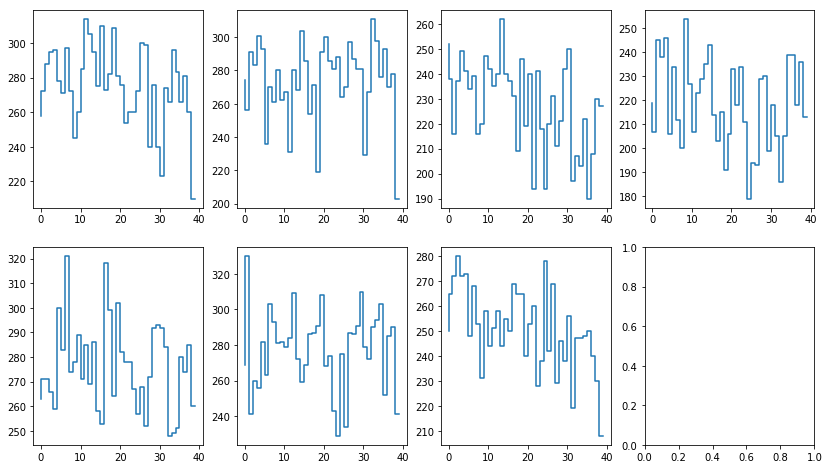

plot i= 1400


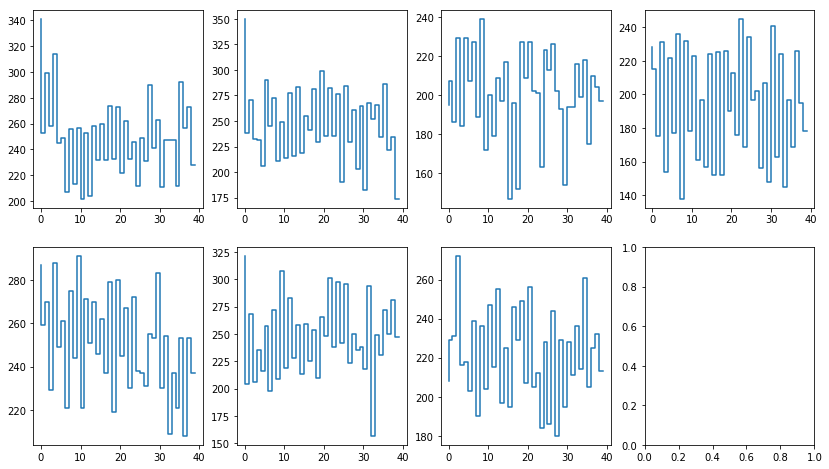

plot i= 1500


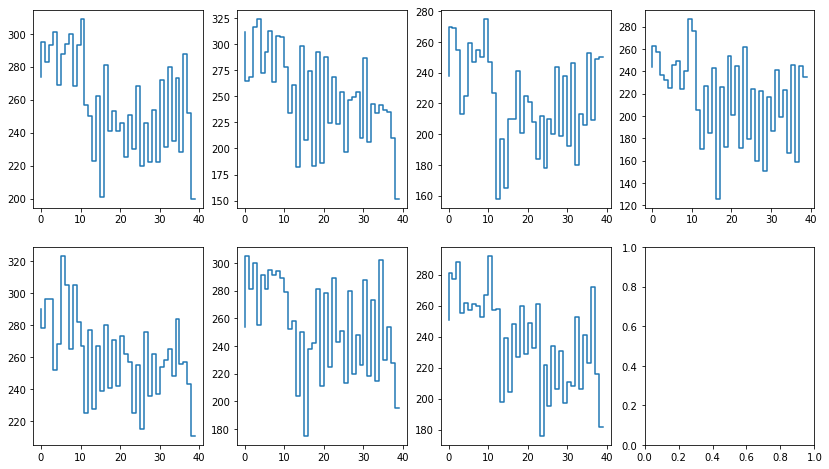

plot i= 1600


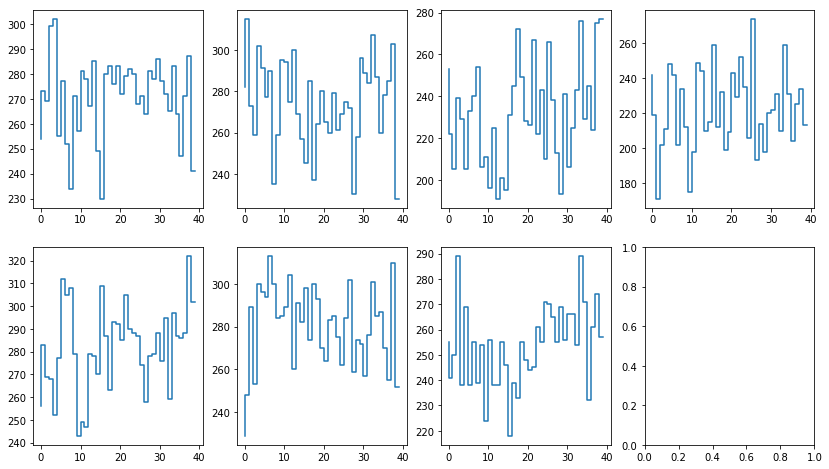

plot i= 1700


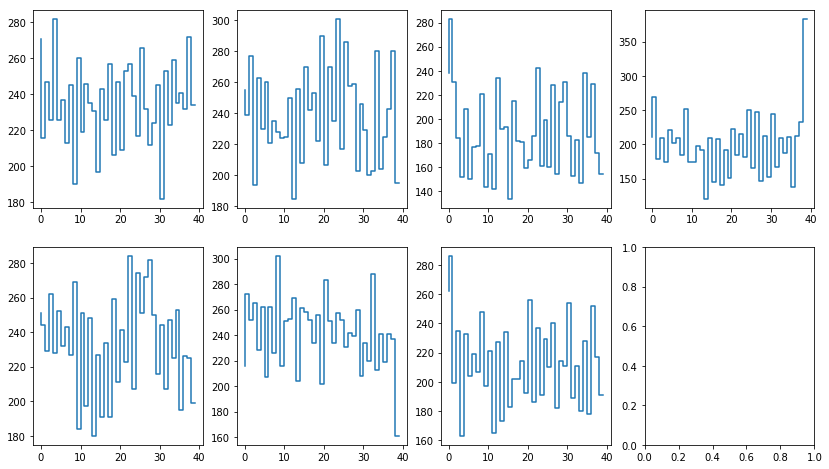

plot i= 1800


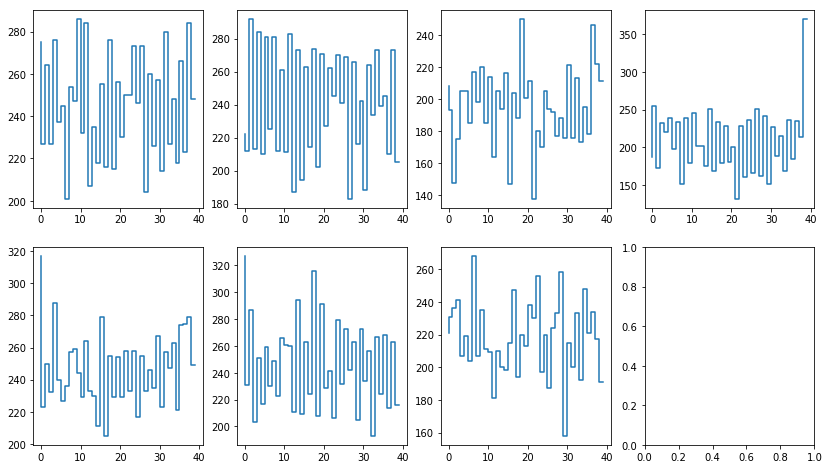

plot i= 1900


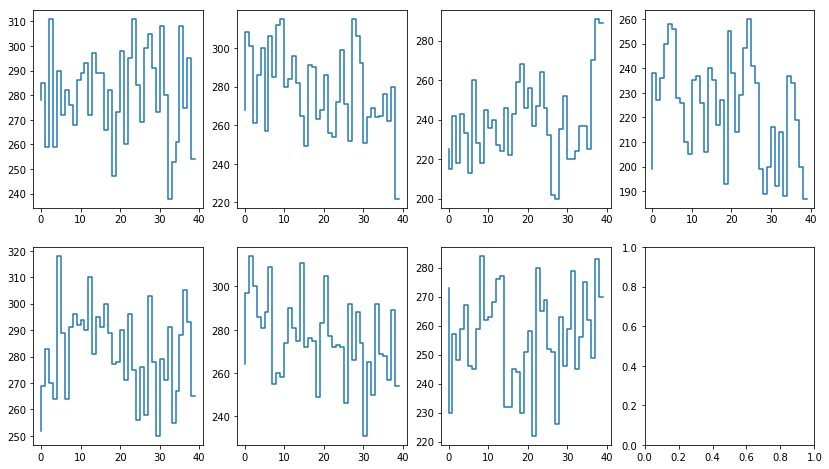

plot i= 2000


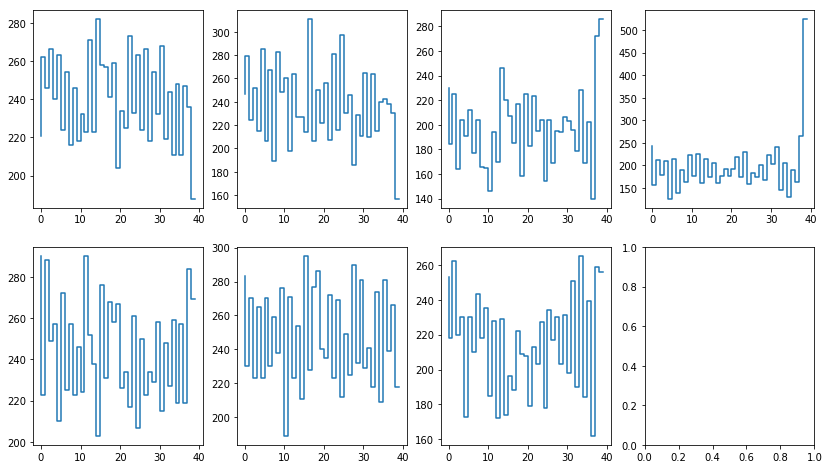

plot i= 2100


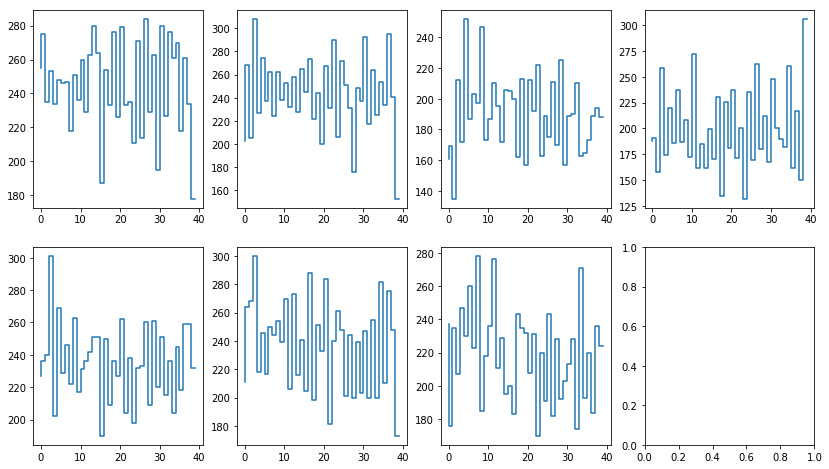

plot i= 2200


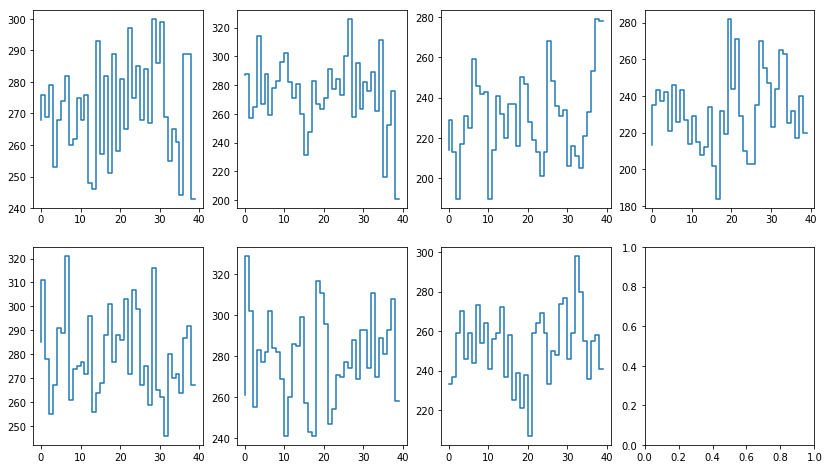

plot i= 2300


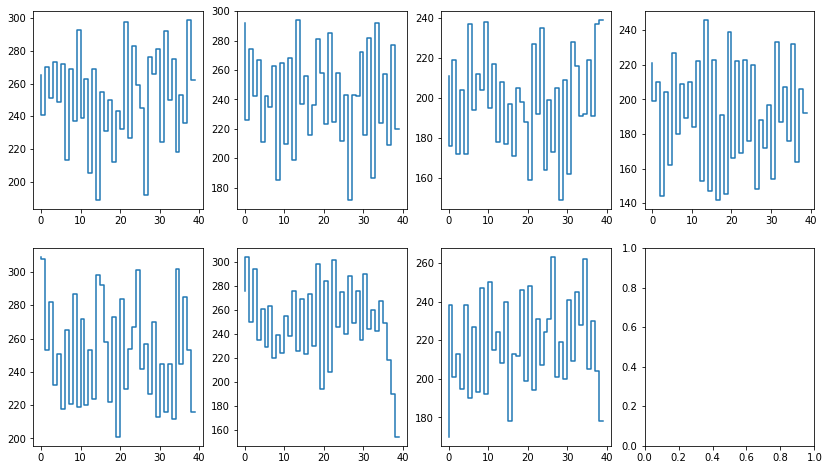

plot i= 2400


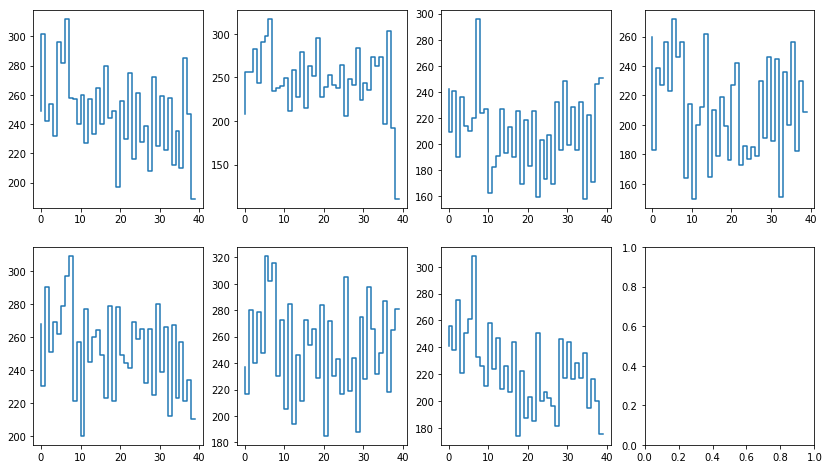

plot i= 2500


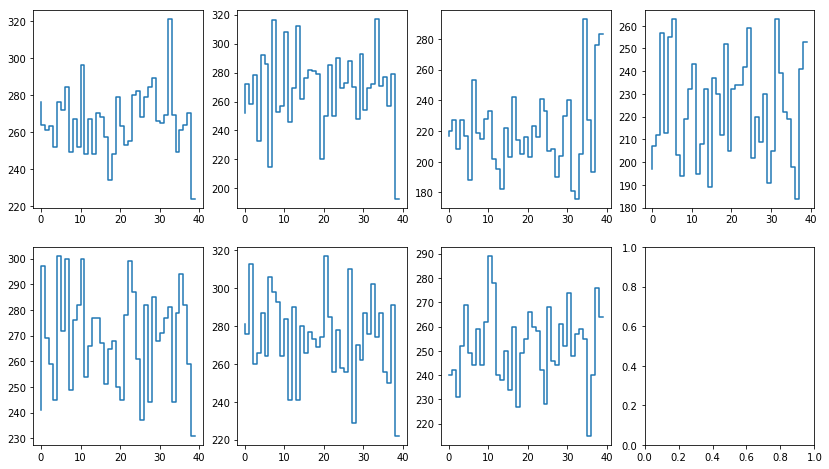

plot i= 2600


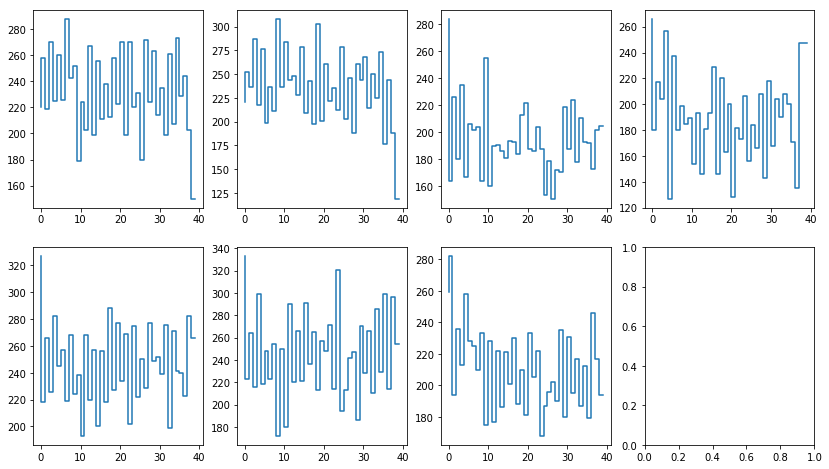

plot i= 2700


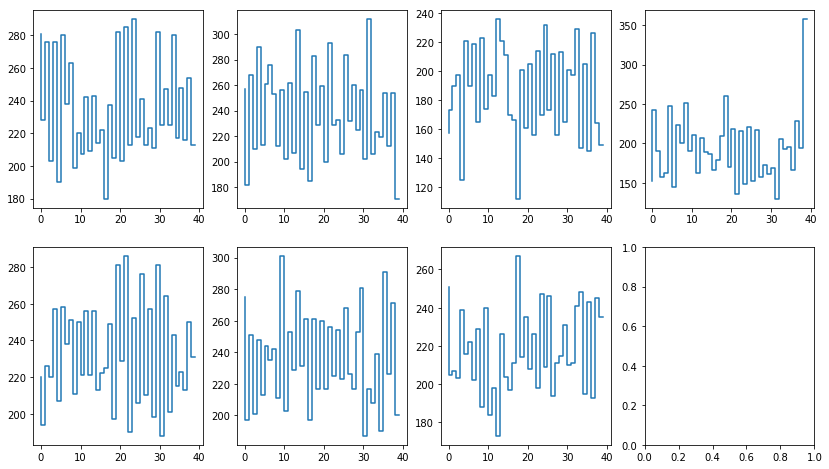

plot i= 2800


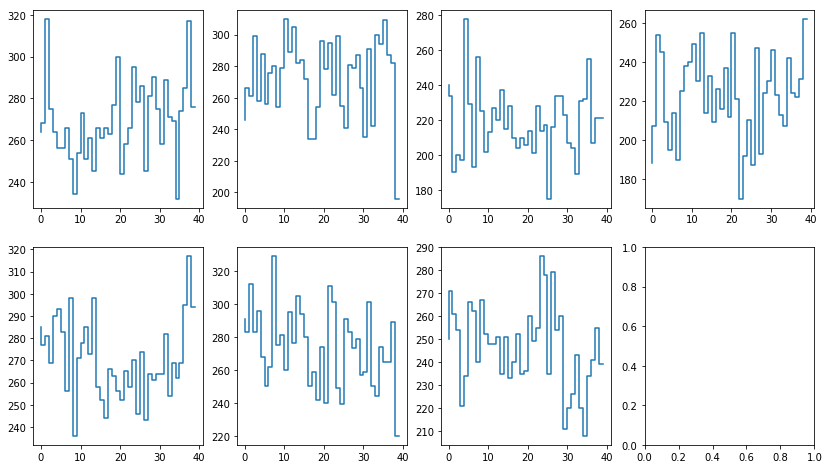

plot i= 2900


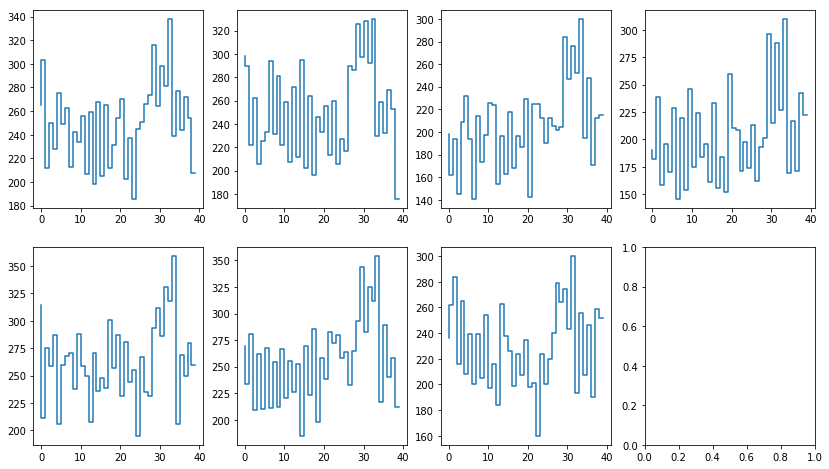

plot i= 3000


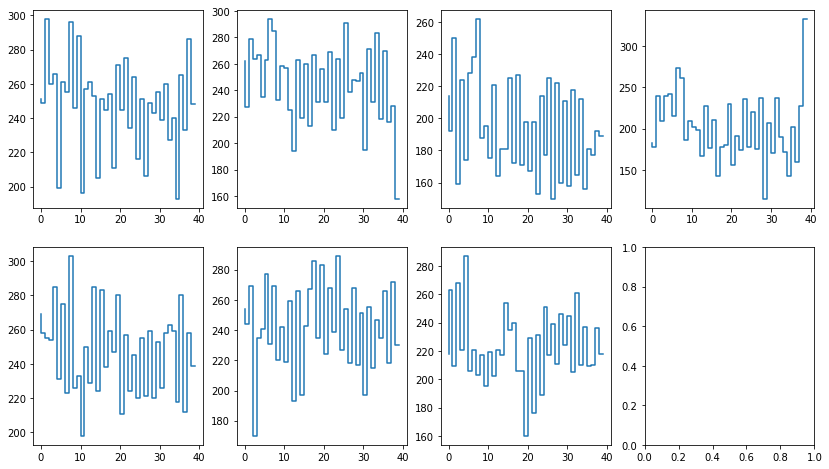

plot i= 3100


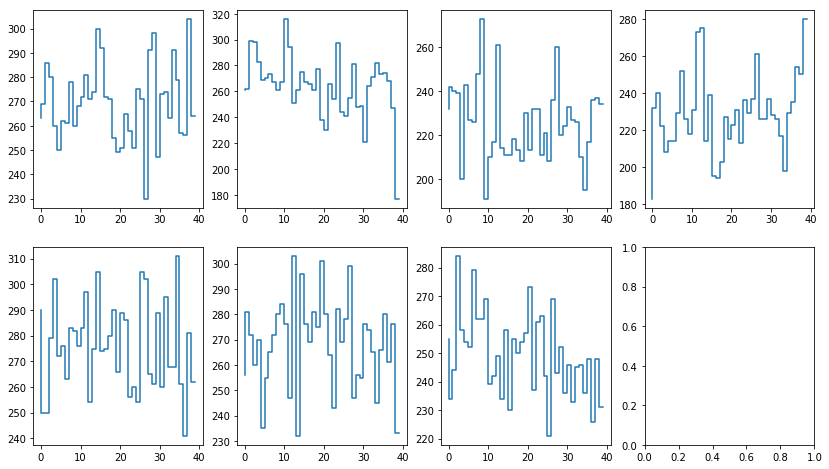

plot i= 3200


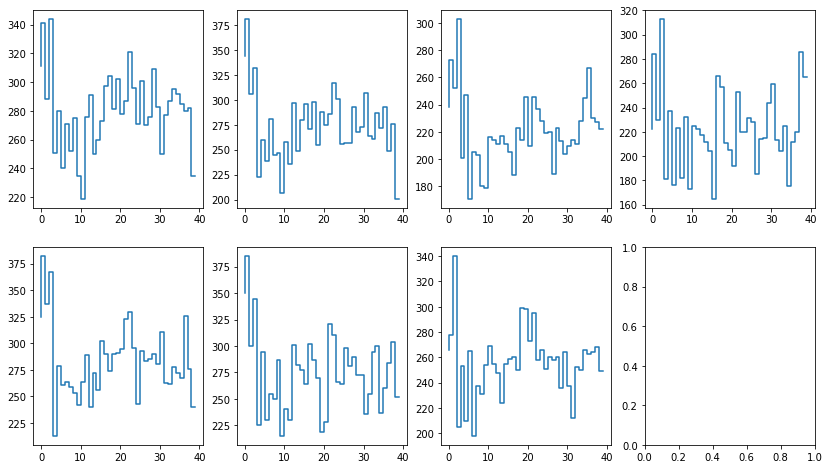

plot i= 3300


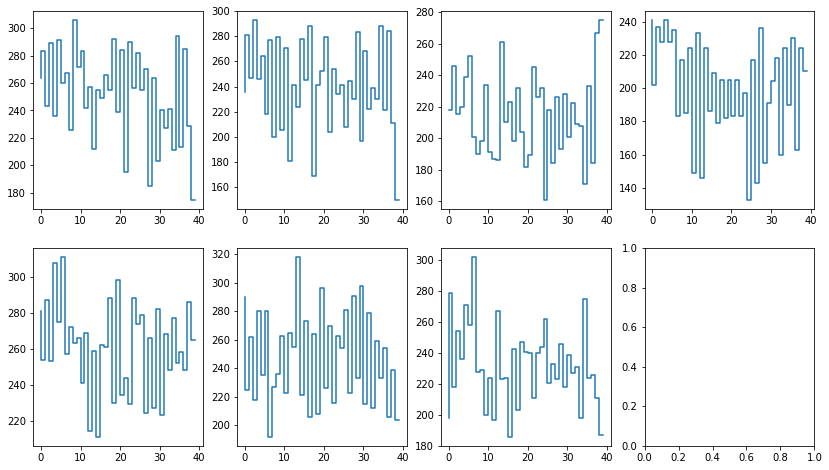

plot i= 3400


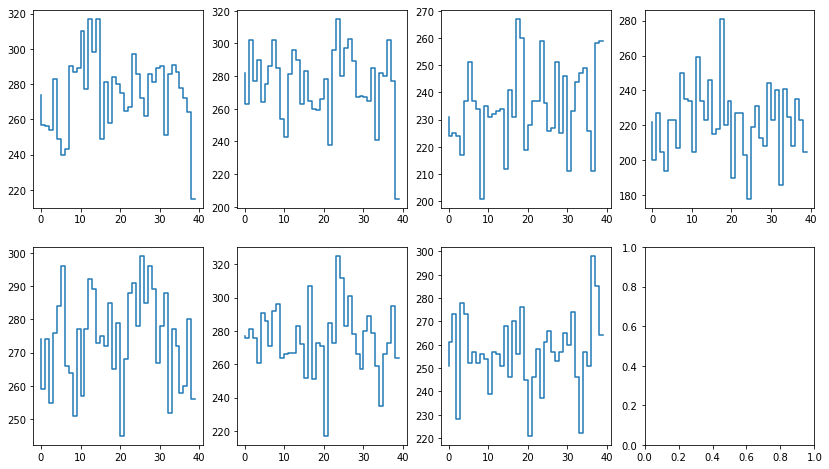

[6090. 5687. 6528. ... 8599. 8109. 6443.]


In [9]:
plt.rcParams['figure.figsize'] = (14, 8)

nch = 7
roisize = 40
size4drs = 4 * 1024

meanped = np.zeros((nch, 2, size4drs), dtype=np.float64)
numped = np.zeros((nch, 2, size4drs), dtype=np.int32)

path_to_data = os.path.join("/home", "pawel1", "Pulpit", "Astrophysics", "CTA", "dragon",
                            "data", "dane_lst", "20180705", "Date20180705.0000.fits.fz")
reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)
for i in range(0, 3500):
    #print("Event i = ", i)
    nr = 53
    ev = seeker[i]
    data, first_cap = get_data_from_module(ev, nr)
    if (i%100 == 0):
        print("plot i=", i)
        plot(ev, nr, hg)
        
    for i in range(0, nch):
            for j in range(0, 2):
                fc = int(first_cap[j,i])
                for k in range(0, roisize-2):
                    posabs = int((k+fc)%size4drs)               
                    val = data[j, i, k]
                    meanped[i, j, posabs] += val
                    numped[i, j, posabs] += 1



print(meanped[0, 0, :])

/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/protozfits/__init__.py:56: UserWarning:         Multiple open zfits files at the same time are not supported.
        Reading from mutliple open tables at the same time will reset these
        tables continously and you will read always the same events.
        
  ''')


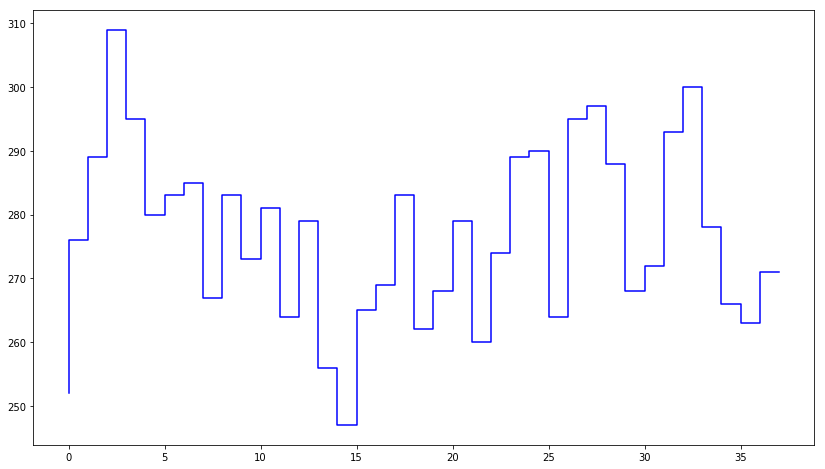

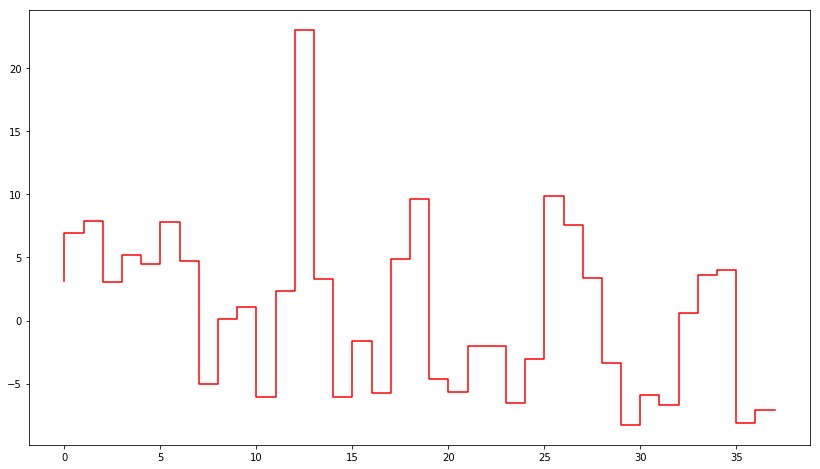

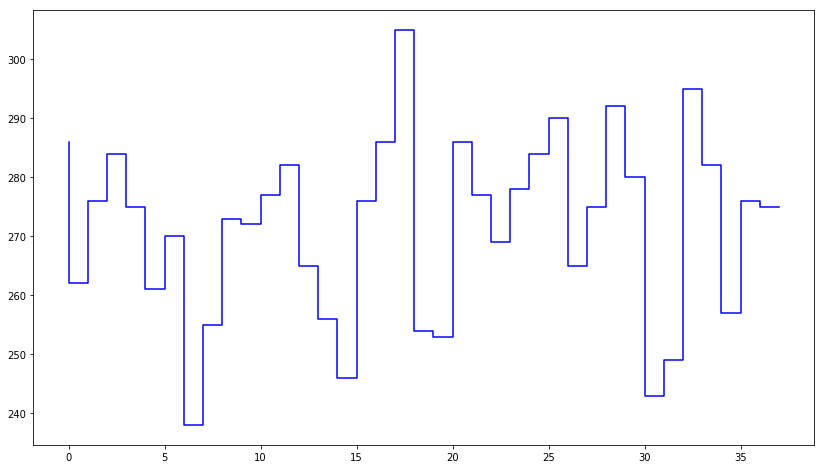

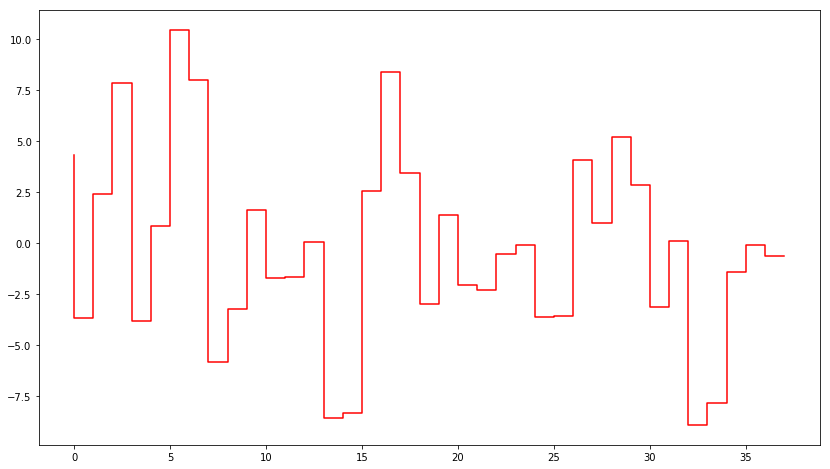

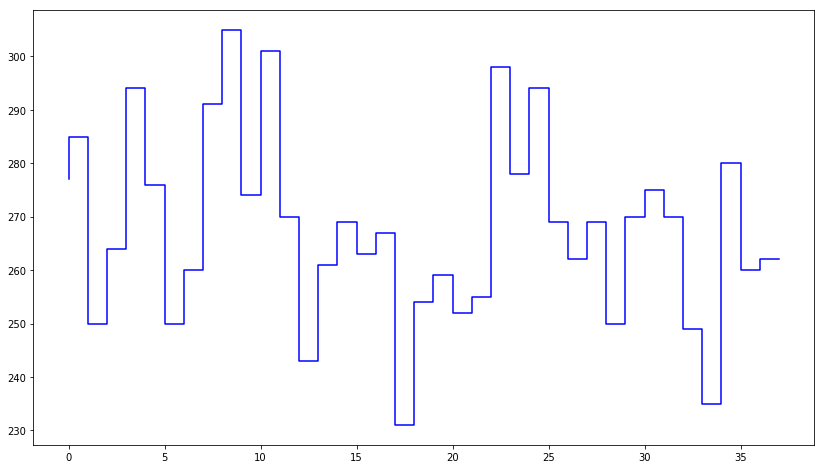

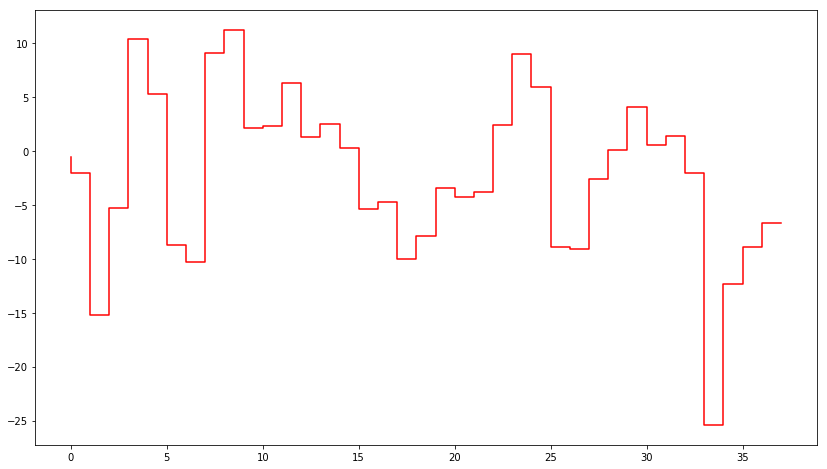

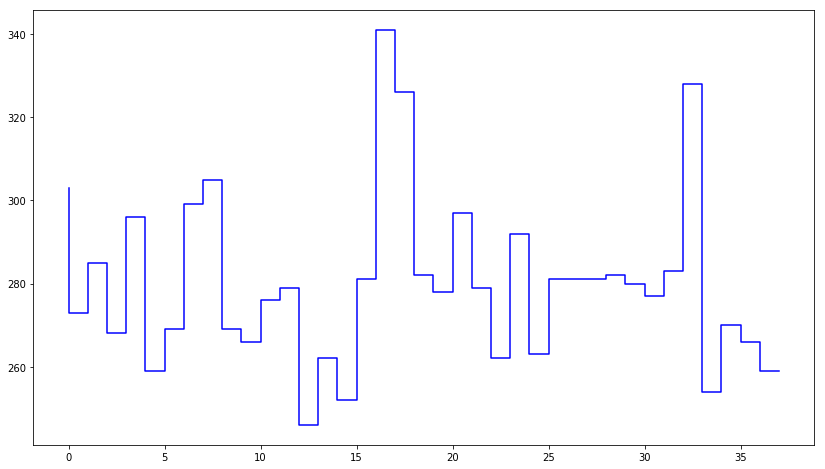

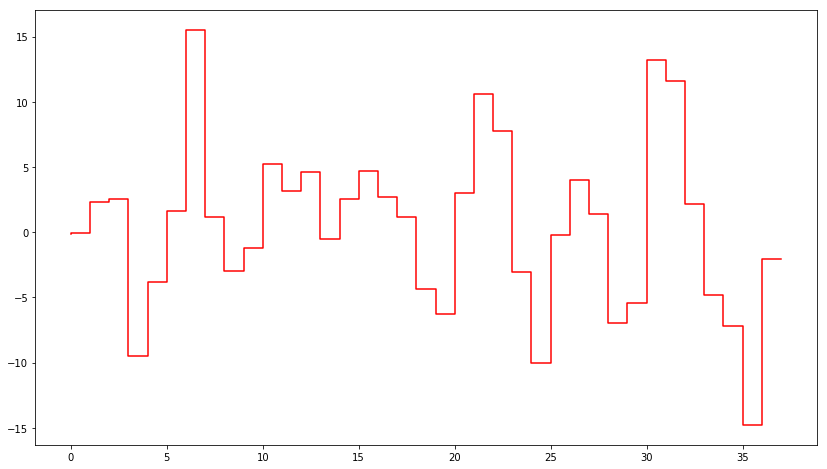

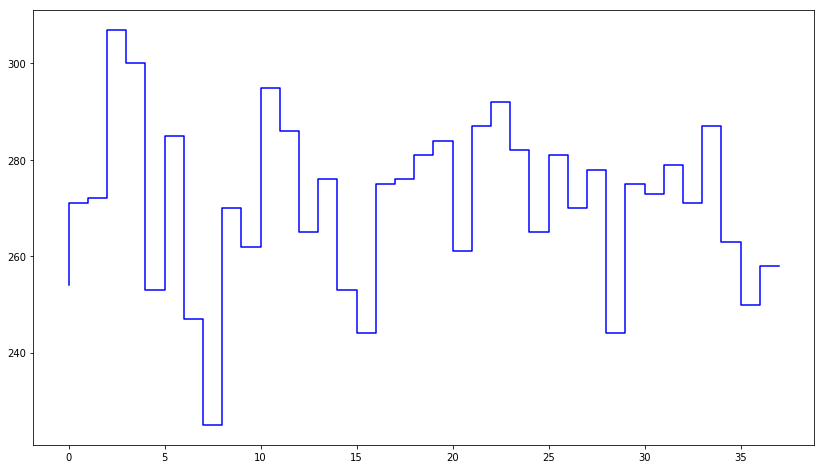

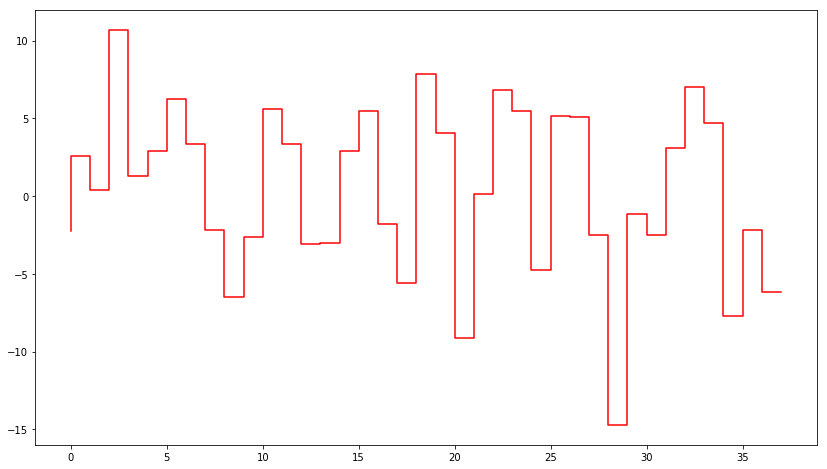

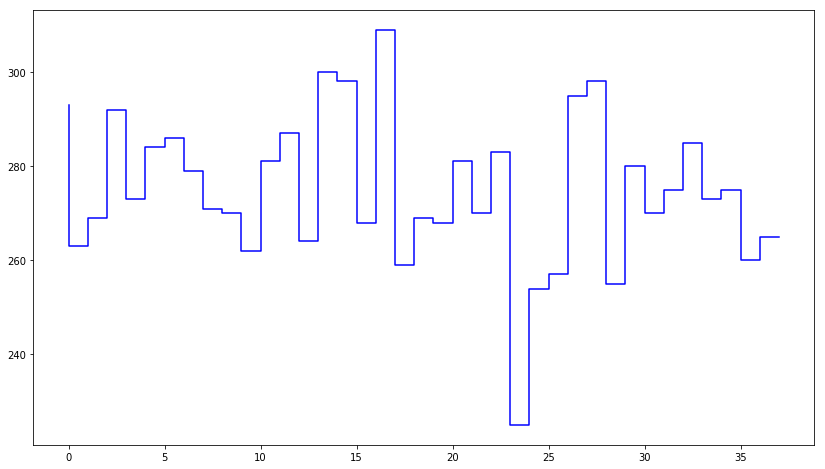

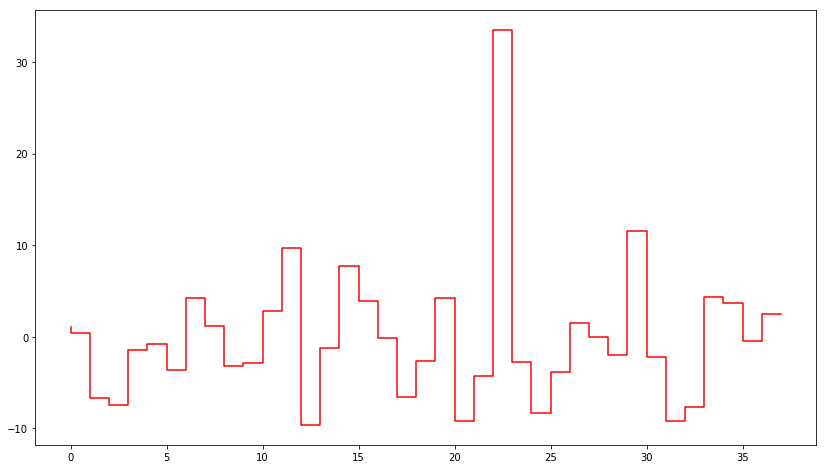

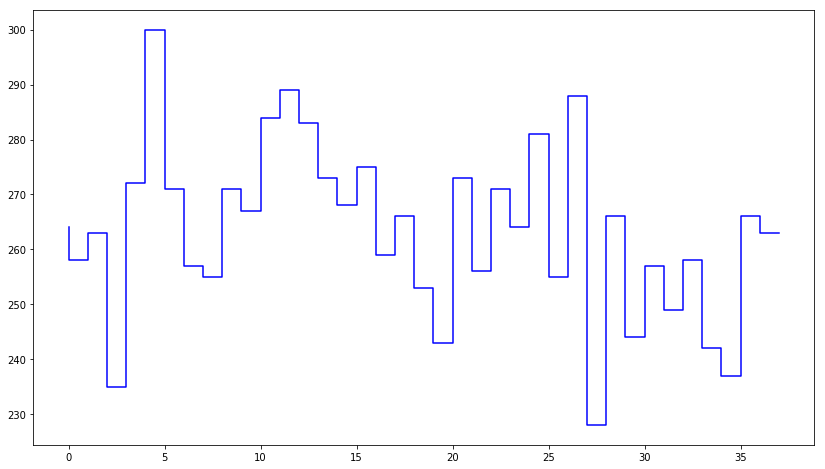

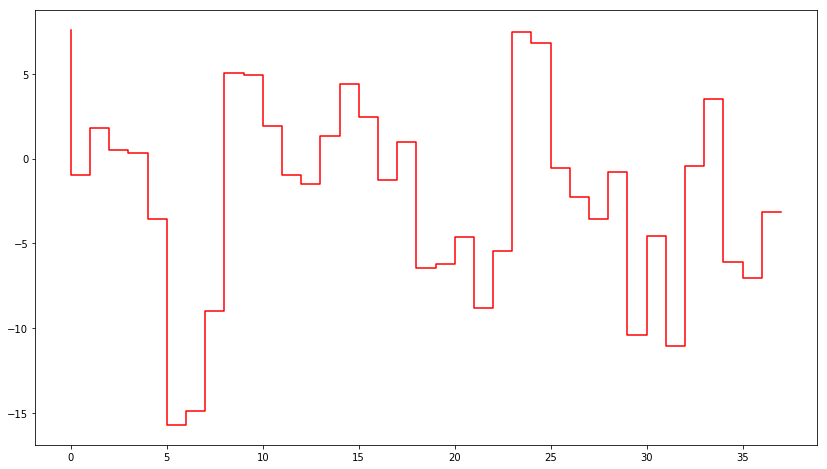

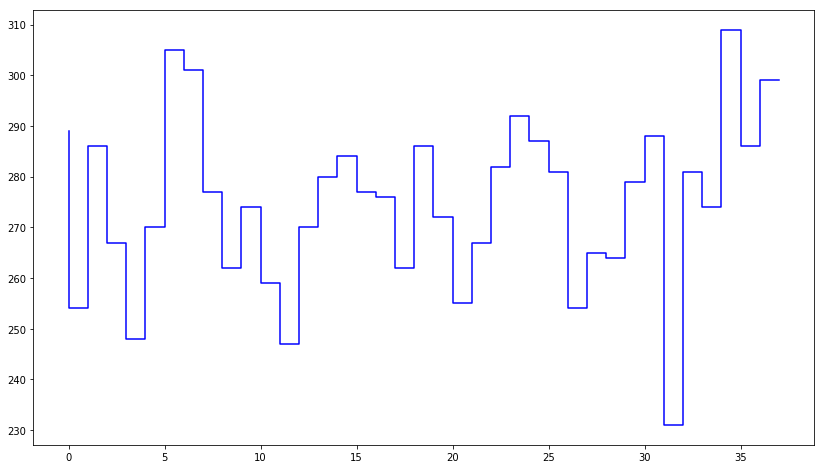

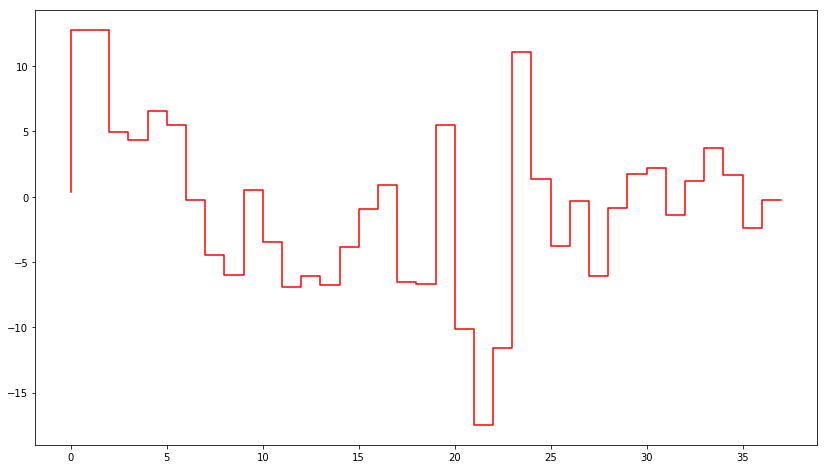

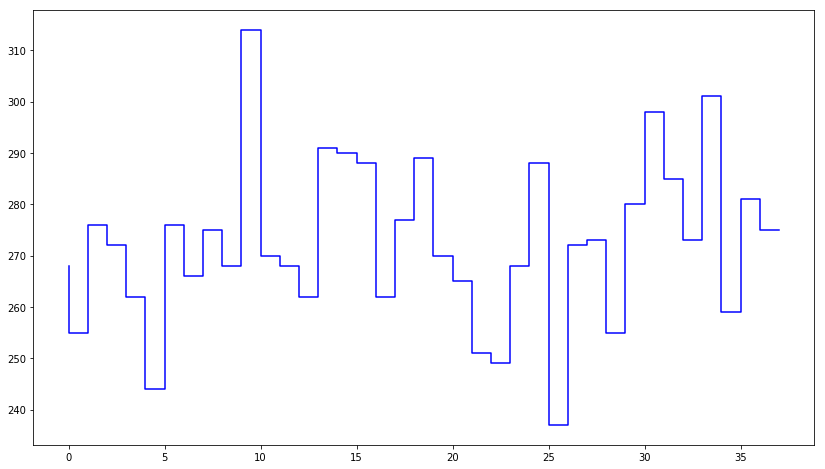

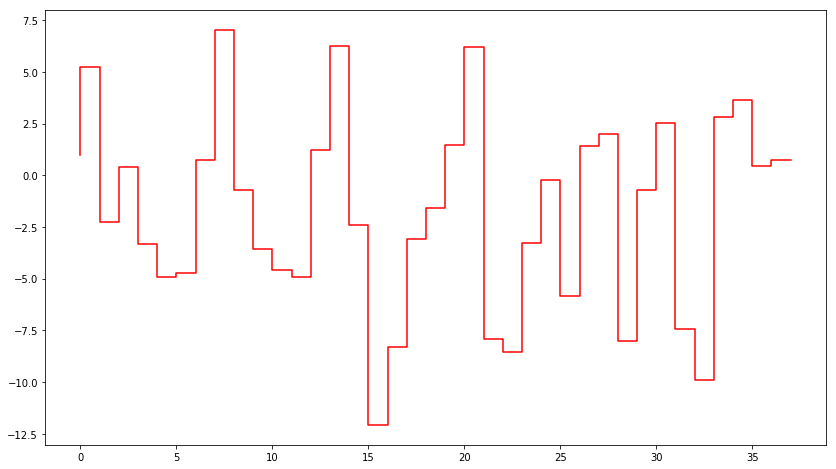

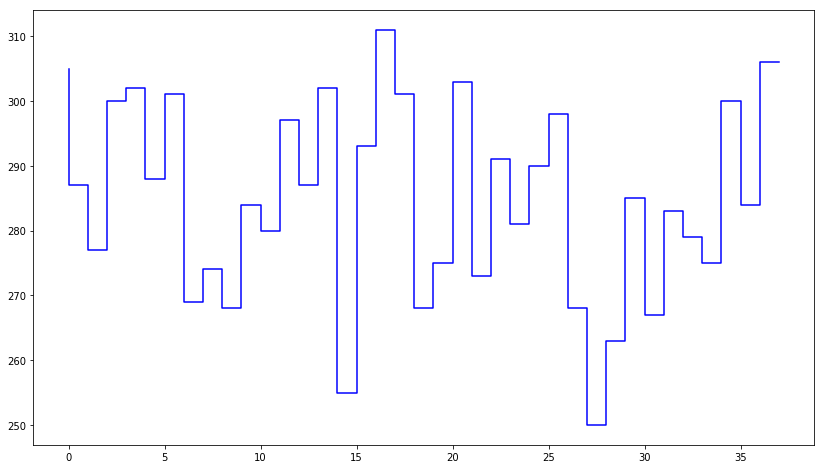

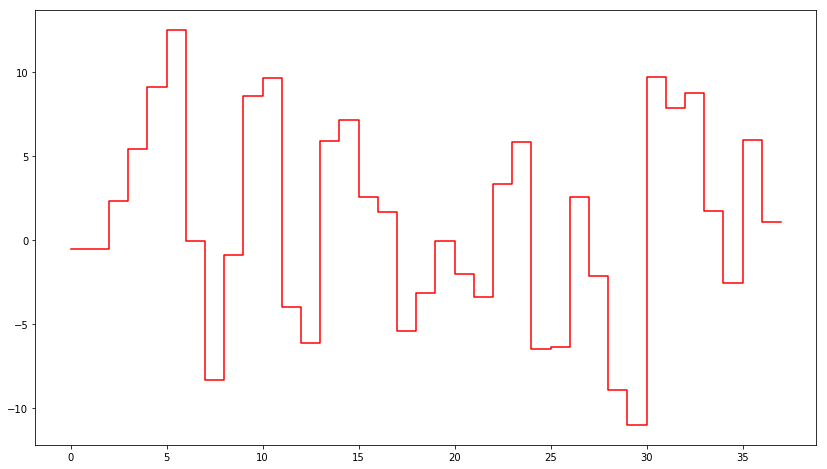

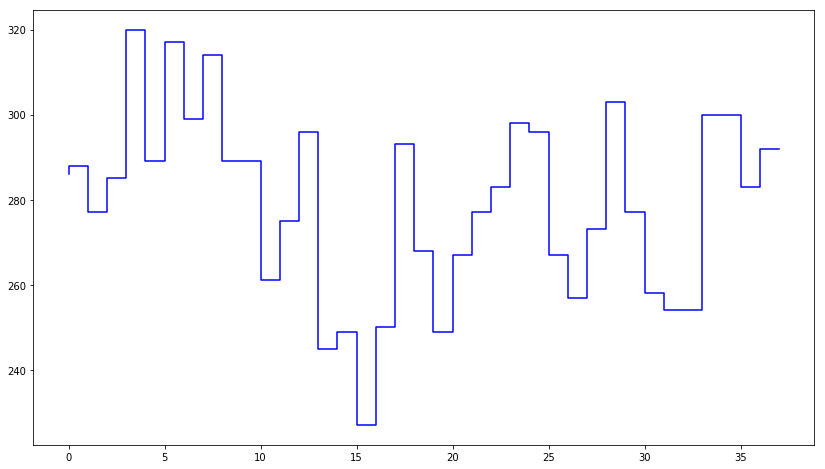

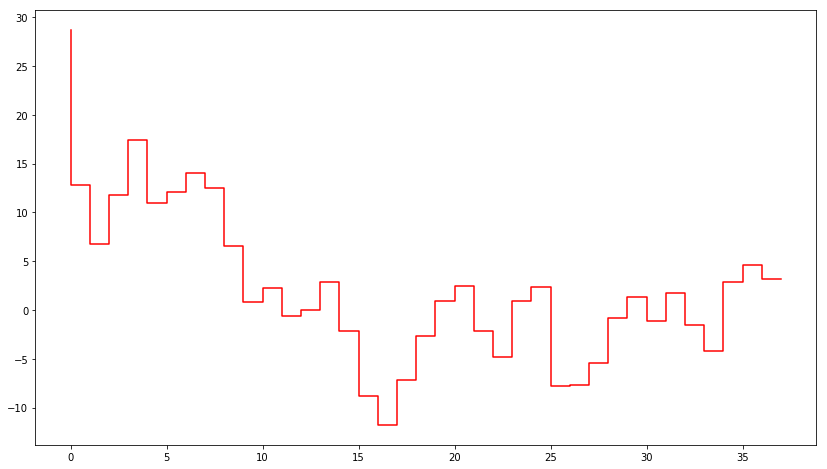

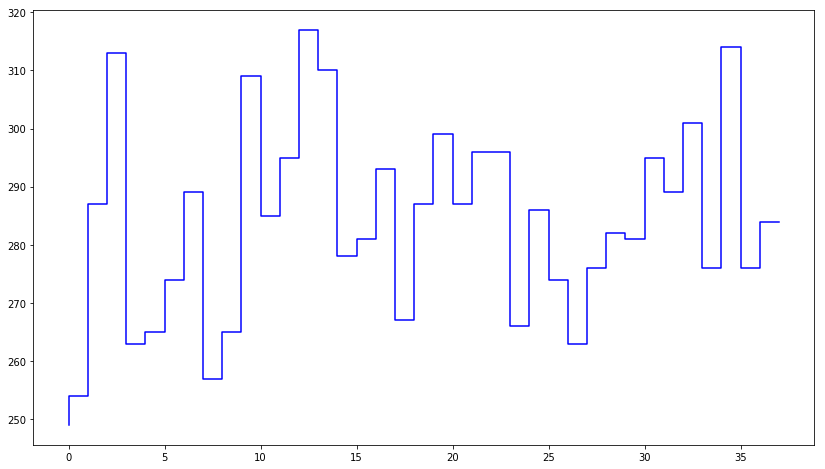

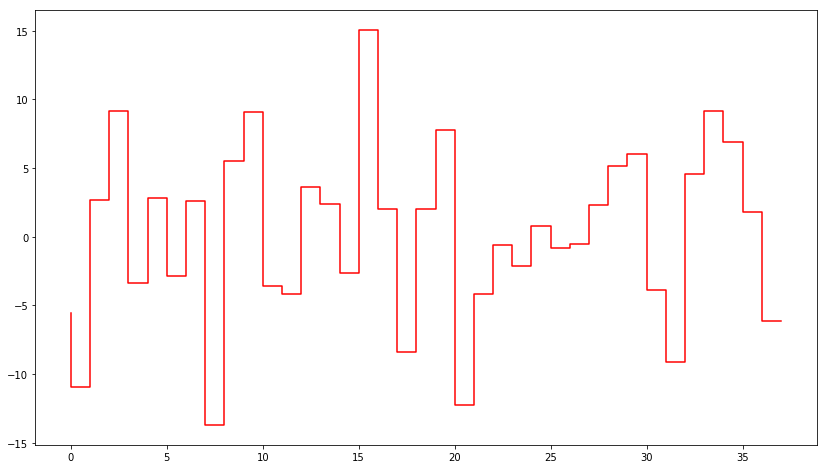

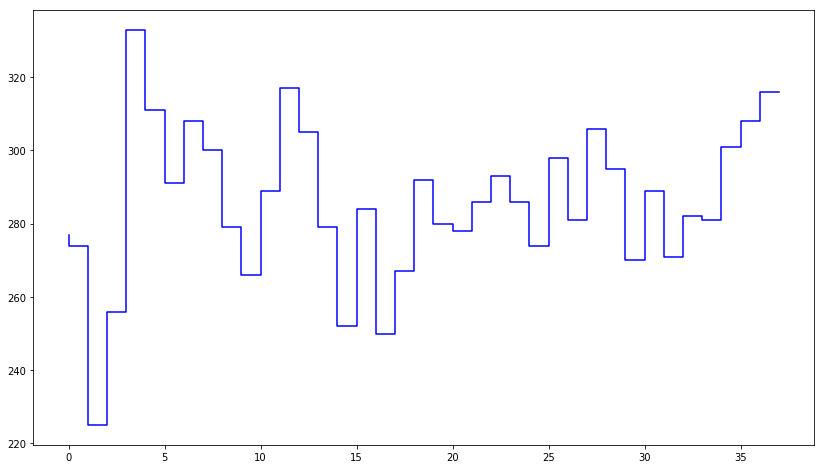

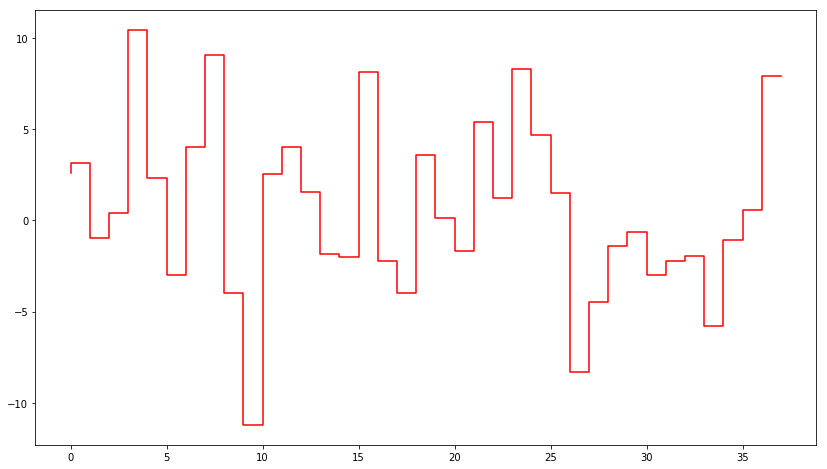

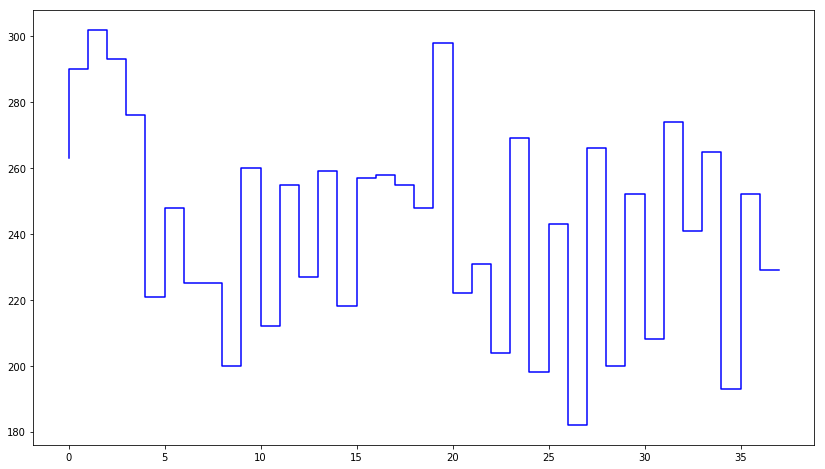

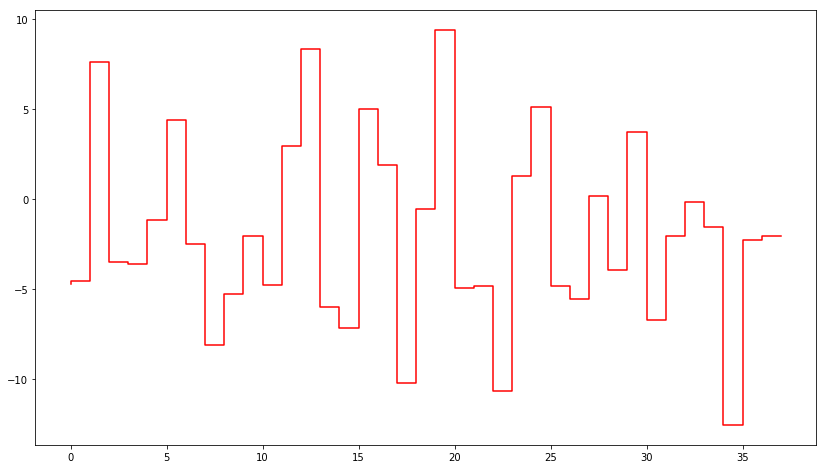

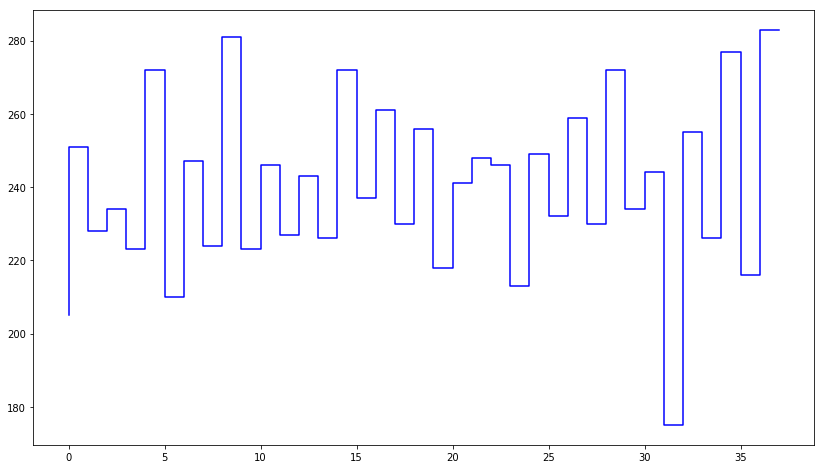

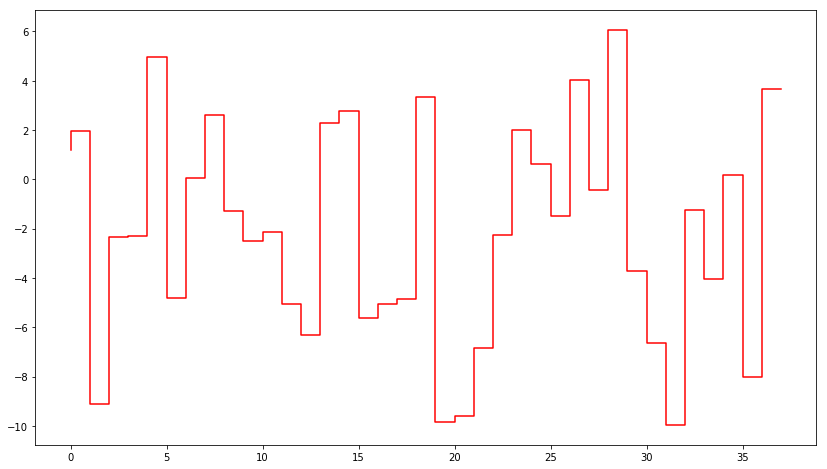

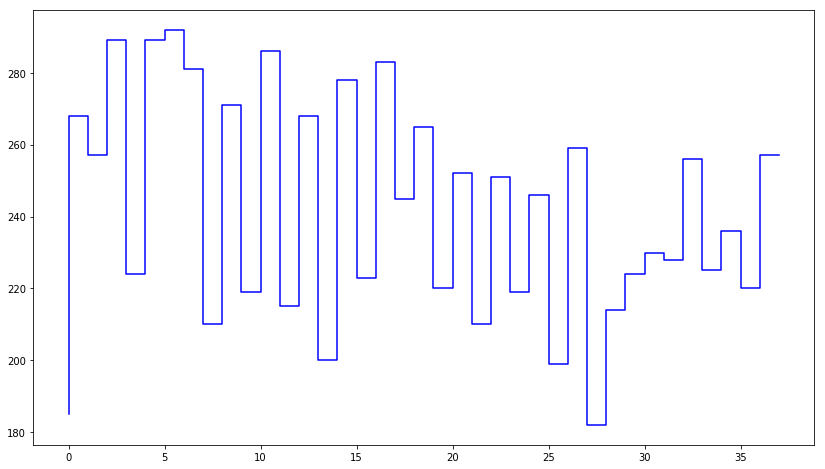

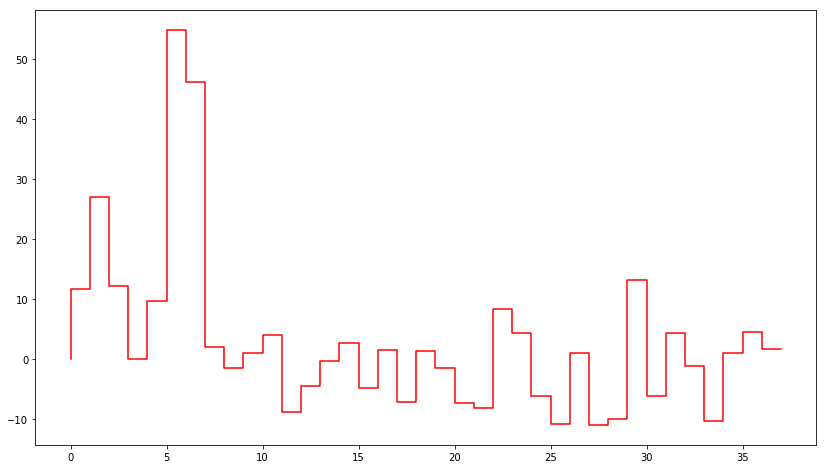

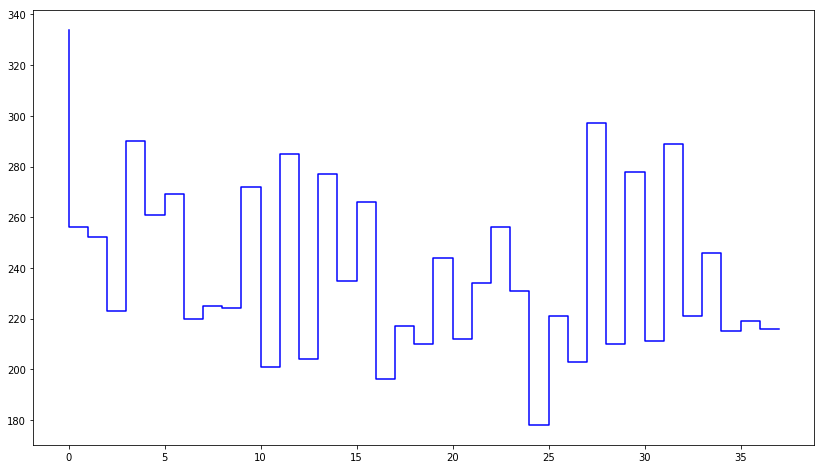

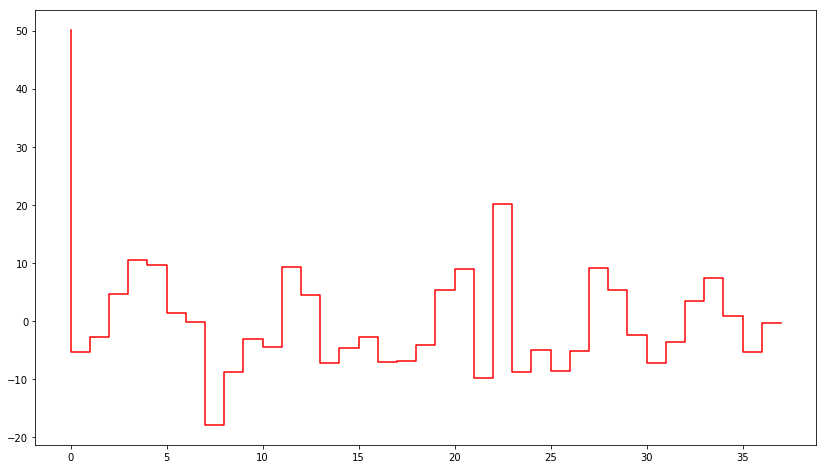

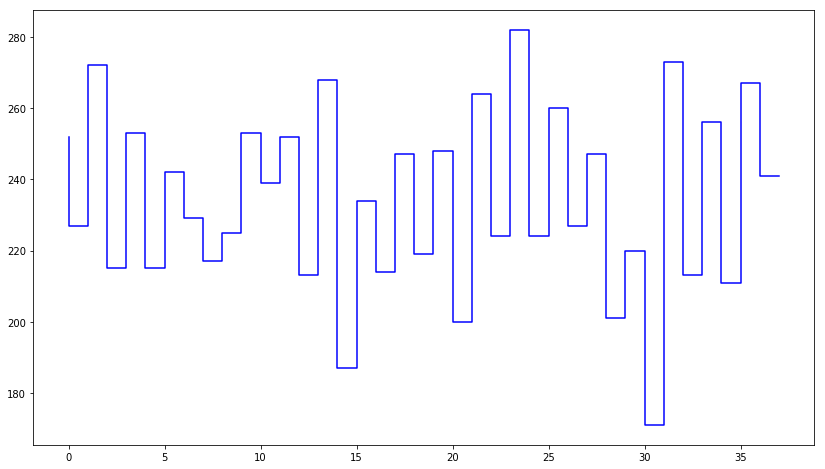

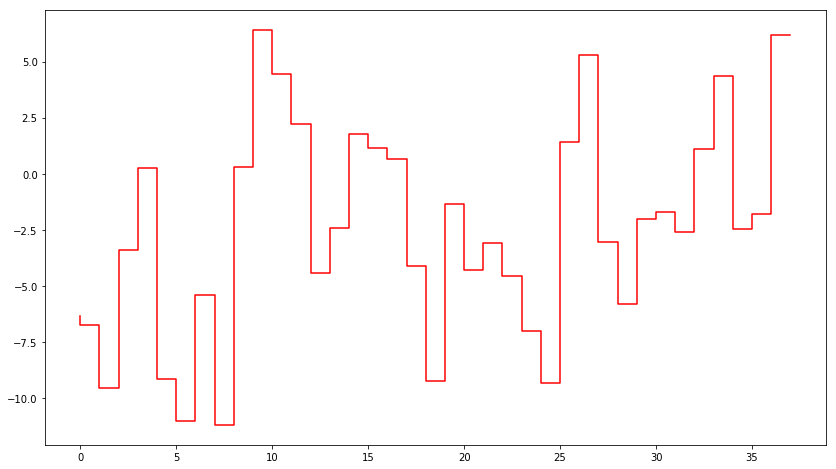

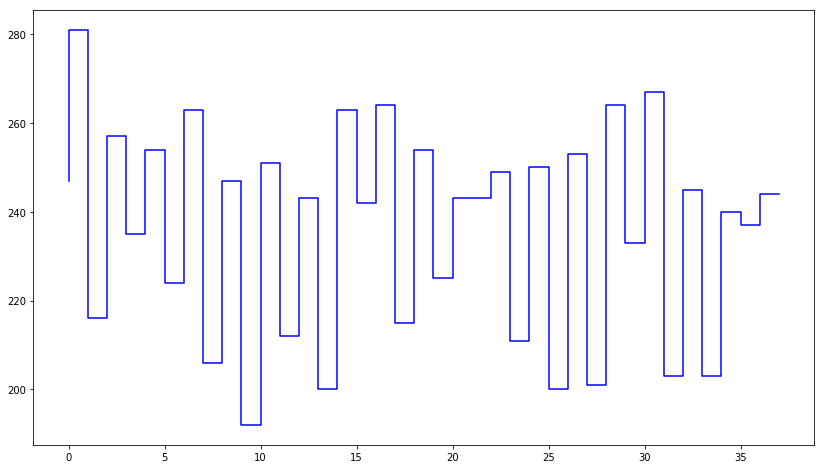

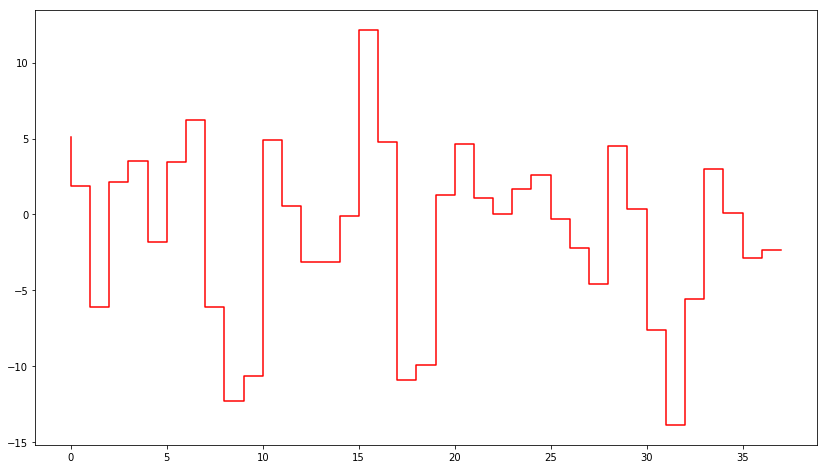

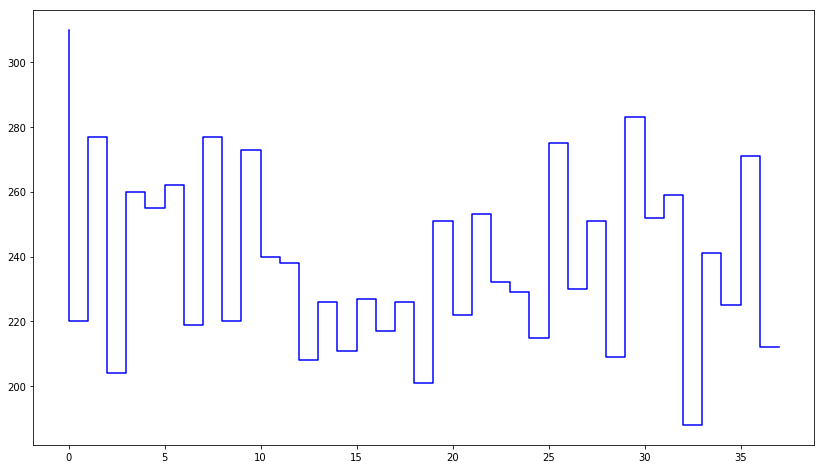

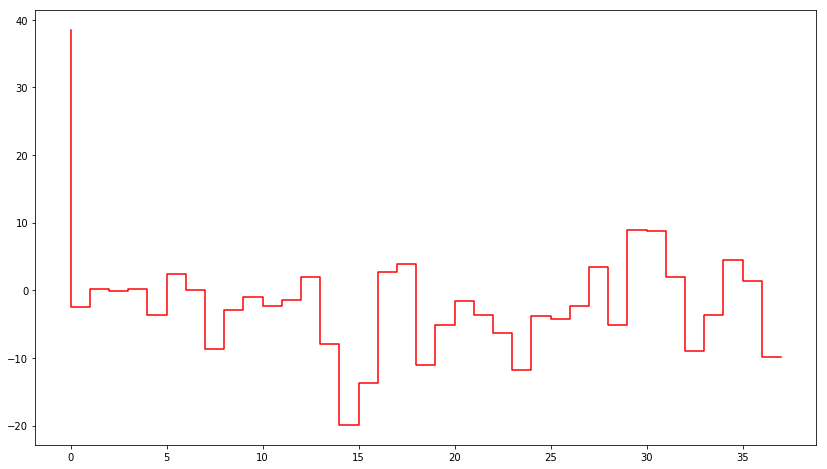

In [33]:
pedestal = meanped[:, :, :]/numped[:, :, :]

reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)

for i in range(3500, 3520):
    nr = 53
    ev = seeker[i]
    data, first_cap = get_data_from_module(ev, nr)
    t = np.linspace(0, 37, 38)
    
    plt.figure()
    plt.step(t, data[0, 0, :38], color="blue")
    plt.show()
    
    d = []
    fc = int(first_cap[0,0])
    for k in range(0, roisize-2):
        posabs = int((k+fc)%size4drs)
        val = data[0, 0, k] - pedestal[0, 0, posabs]
        d.append(val) 
    
    
    plt.figure()
    plt.step(t, d, color="red")                  
    plt.show()

In [20]:
ev = seeker[10]
data, first_cap = get_data_from_module(ev, nr)
print(data.shape)
print(meanped[0, 0, :]/numped[0, 0, :]) #/numped[0, 0, :]                            
print(numped[0, 0, :])

(2, 7, 40)
[243.6        227.48       233.14285714 ... 296.51724138 279.62068966
 222.17241379]
[25 25 28 ... 29 29 29]


In [7]:
ev = seeker[15]
print(ev.r0.tel[0].waveform.shape)
print(ev.lst.tel[0].evt.first_capacitor_id.shape)
print(ev.lst.tel[0].svc.num_modules)

(2, 1834, 40)
(2096,)
262


In [ ]:
plt.rcParams['figure.figsize'] = (14, 8)

for i in range(0, 5):
    print("Event nr: ", i)
    ev = seeker[i]
    plot(ev, 1, hg)


In [ ]:
ev = seeker[15]
np.where(ev.r0.tel[0].waveform>0)

In [8]:
print(ev.lst.tel[0])

{'evt': {'cdts_data': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
         'chips_flags': array([0, 0, 0, ..., 0, 0, 0], dtype=uint16),
         'configuration_id': 1,
         'counters': array([ 44,   0, 105, ...,   0,   0,   0], dtype=uint8),
         'drs_tag': array([2101, 2156, 2144, ..., 2010, 1992, 2000], dtype=uint16),
         'drs_tag_status': array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 1

In [20]:
print(ev.lst.tel[0].svc.pixel_ids.shape)

(1379,)


In [28]:
for i, v in enumerate(ev.lst.tel[0].evt.module_status):
    print("id = {} value={}".format(i, v))

id = 0 value=0
id = 1 value=1
id = 2 value=1
id = 3 value=1
id = 4 value=1
id = 5 value=1
id = 6 value=1
id = 7 value=1
id = 8 value=1
id = 9 value=1
id = 10 value=1
id = 11 value=1
id = 12 value=1
id = 13 value=1
id = 14 value=1
id = 15 value=1
id = 16 value=1
id = 17 value=1
id = 18 value=1
id = 19 value=1
id = 20 value=1
id = 21 value=1
id = 22 value=1
id = 23 value=1
id = 24 value=1
id = 25 value=1
id = 26 value=1
id = 27 value=1
id = 28 value=1
id = 29 value=1
id = 30 value=1
id = 31 value=1
id = 32 value=1
id = 33 value=1
id = 34 value=1
id = 35 value=1
id = 36 value=1
id = 37 value=1
id = 38 value=1
id = 39 value=1
id = 40 value=1
id = 41 value=1
id = 42 value=1
id = 43 value=1
id = 44 value=1
id = 45 value=1
id = 46 value=1
id = 47 value=1
id = 48 value=1
id = 49 value=1
id = 50 value=1
id = 51 value=1
id = 52 value=0
id = 53 value=1
id = 54 value=1
id = 55 value=1
id = 56 value=1
id = 57 value=1
id = 58 value=1
id = 59 value=1
id = 60 value=1
id = 61 value=1
id = 62 value=1
id